In [13]:
# imports

import sqlalchemy
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import pickle
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor


In [14]:
#Exportamos datasets(elegir esta opción )

diamonds_train = pd.read_csv('./data/diamondssql.csv')
diamonds_test = pd.read_csv('./data/diamonds_test.csv')


In [15]:
#Quitamos la columna city del dataset: 
diamonds_train = diamonds_train.drop(['city'], axis=1)


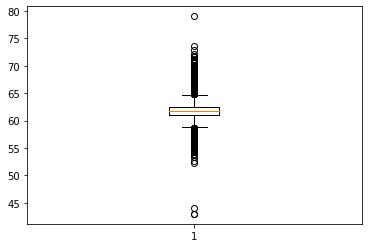

array(['VS2', 'VS1', 'SI1', 'SI2', 'IF', 'VVS1', 'VVS2', 'I1'],
      dtype=object)

In [16]:
#Identify outliers
plt.boxplot(diamonds_train["depth"])
plt.show()
diamonds_train["clarity"].unique()

In [17]:
# Si el valor de skew value no se encuentra entre -1 y +1 es porque hay outliers
#print(diamonds_train["carat"].skew())
# Result 1.07
print(diamonds_train["depth"].skew())
# Result -0.18


-0.10960361727045954


In [18]:
#Voy a quitar Outliers de depth y carat

#Probamos quitando identificando los quiantiles más bajos y altos de Depth

'''Así que siguiendo un hilo de stackoverflow, aplico estas fórmulas y lo hago 4 veces en los valores cuantitativos del dataset.'''
q_low = diamonds_train["depth"].quantile(0.05)
q_hi  = diamonds_train["depth"].quantile(0.95)
diamonds_train = diamonds_train[(diamonds_train["depth"] < q_hi) & (diamonds_train["depth"] > q_low)]


In [19]:
#Probamos quitando identificando los quiantiles más bajos y altos de Depth

'''Así que siguiendo un hilo de stackoverflow, aplico estas fórmulas y lo hago 4 veces en los valores cuantitativos del dataset.'''
q_low = diamonds_train["carat"].quantile(0.05)
q_hi  = diamonds_train["carat"].quantile(0.95)
diamonds_train = diamonds_train[(diamonds_train["carat"] < q_hi) & (diamonds_train["carat"] > q_low)]

In [20]:
#Quitamos los aoutlier: Metodo alternativo


#def remove_outlier(df_in, col_name):
    #q1 = df_in[col_name].quantile(0.05)
    #q3 = df_in[col_name].quantile(0.95)
    #iqr = q3-q1 #Interquartile range
    #fence_low  = q1-1.5*iqr
    #fence_high = q3+1.5*iqr
    #df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    #return df_out
    
    
#diamonds_train= remove_outlier(diamonds_train,'x')
#diamonds_train= remove_outlier(diamonds_train,'y')
#diamonds_train= remove_outlier(diamonds_train,'z')
#diamonds_train= remove_outlier(diamonds_train,'carat')
#diamonds_train= remove_outlier(diamonds_train,'depth')
#diamonds_train= remove_outlier(diamonds_train,'table')

In [21]:
#diamonds_train= remove_outlier(diamonds_train,'x')
#diamonds_train= remove_outlier(diamonds_train,'y')
#diamonds_train= remove_outlier(diamonds_train,'z')
#diamonds_train= remove_outlier(diamonds_train,'carat')
#diamonds_train= remove_outlier(diamonds_train,'depth')
#diamonds_train= remove_outlier(diamonds_train,'table')

In [22]:
## A continuación vamos a cambiar los datos de tipo de color en valores numericos con la función encoder:
from sklearn.preprocessing import OrdinalEncoder
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[['J', 'I', 'H', 'G', 'F', 'E', 'D']])
# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(diamonds_train[["color"]])
diamonds_train["color-encoded"] = encoder.transform(diamonds_train[["color"]])
diamonds_train.drop("color", axis = 1 , inplace = True)

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(diamonds_test[["color"]])
diamonds_test["color-encoded"] = encoder.transform(diamonds_test[["color"]])
diamonds_test.drop("color", axis = 1 , inplace = True)




In [23]:

# Creamos el codificador indicandole el orden de la variables de CUT

encoder = OrdinalEncoder(categories=[['Premium', 'Very Good', 'Fair', 'Good', 'Ideal']])
# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(diamonds_train[["cut"]])
diamonds_train["cut-encoded"] = encoder.transform(diamonds_train[["cut"]])
diamonds_train.drop("cut", axis = 1 , inplace = True)

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(diamonds_test[["cut"]])
diamonds_test["cut-encoded"] = encoder.transform(diamonds_test[["cut"]])
diamonds_test.drop("cut", axis = 1 , inplace = True)

In [28]:
# Creamos el codificador indicandole el orden de la variables de Clarity


encoder = OrdinalEncoder(categories=[['VS2', 'SI1', 'SI2', 'VS1', 'IF', 'VVS1', 'VVS2', 'I1']])
# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(diamonds_train[["clarity"]])
diamonds_train["clarity-encoded"] = encoder.transform(diamonds_train[["clarity"]])
diamonds_train.drop("clarity", axis = 1 , inplace = True)

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(diamonds_test[["clarity"]])
diamonds_test["clarity-encoded"] = encoder.transform(diamonds_test[["clarity"]])
diamonds_test.drop("clarity", axis = 1 , inplace = True)

In [29]:
diamonds_train.describe()

,price,depth,carat,table,x,y,z,color-encoded,cut-encoded,clarity-encoded
count,31398.000000,31398.000000,31398.000000,31398.000000,31398.000000,31398.000000,31398.000000,31398.000000,31398.000000,31398.000000
mean,3566.687082,61.760141,0.754746,57.250131,5.683985,5.689174,3.511615,3.456653,2.221511,2.114625
std,3223.465585,0.958859,0.369489,2.075753,0.947035,0.942152,0.585763,1.674432,1.757927,1.947772
min,335.000000,59.400000,0.310000,43.000000,0.000000,4.110000,0.000000,0.000000,0.000000,0.000000
25%,1035.000000,61.100000,0.410000,56.000000,4.780000,4.790000,2.960000,2.000000,0.000000,1.000000
50%,2405.000000,61.800000,0.700000,57.000000,5.690000,5.700000,3.520000,3.000000,3.000000,2.000000
75%,5035.000000,62.400000,1.020000,59.000000,6.480000,6.480000,4.010000,5.000000,4.000000,3.000000
max,18806.000000,63.700000,1.690000,73.000000,7.790000,7.790000,5.060000,6.000000,4.000000,7.000000


#Resumen de BD:

- diamonds_train = Csv con la query hecha en SQL e importado 
- diamonds_train_sql = Csv con la query hecha en jupyter
- diamonds_test = Csv que nos da el ejercicio


In [12]:
#Definimos la columna target y configuramos las features del dataset: categóricas o numéricas

target = "price"
cat_features = []
num_features = ['carat','depth','table','x','y','z','color-encoded','cut-encoded','clarity-encoded']



In [43]:
# cambiamos los tipos de para las features categoricas a category en ambos dataset

#for cat in cat_features:
    #diamonds_train[cat] = diamonds_train[cat].astype('category')
    #diamonds_test[cat] = diamonds_test[cat].astype('category')
    
#diamonds_test.describe()



,id,carat,depth,table,x,y,z,color-encoded
count,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000,13485.000000
mean,6742.000000,0.798642,61.739095,57.490337,5.736454,5.739648,3.543474,3.420912
std,3892.928525,0.469399,1.435310,2.237109,1.113671,1.128507,0.731005,1.700614
min,0.000000,0.200000,50.800000,51.000000,0.000000,0.000000,0.000000,0.000000
25%,3371.000000,0.400000,61.000000,56.000000,4.730000,4.730000,2.920000,2.000000
50%,6742.000000,0.700000,61.900000,57.000000,5.700000,5.720000,3.530000,3.000000
75%,10113.000000,1.040000,62.500000,59.000000,6.530000,6.530000,4.040000,5.000000
max,13484.000000,5.010000,79.000000,73.000000,10.740000,31.800000,31.800000,6.000000


In [44]:
# Hacemos getdummies con features numéricas y categóricas para cambiar la disposición de los dtaos para ML en Train

#cat_df_train = pd.get_dummies(diamonds_train[cat_features])
#num_df_train = diamonds_train.loc[:,num_features]
#train_df = pd.concat([cat_df_train,num_df_train],axis=1)

#añadimos un index a train_df

#train_df.head()

In [45]:
# Hacemos getdummies con features numéricas y categóricas para cambiar la disposición de los dtaos para ML en Test

#cat_df_test = pd.get_dummies(diamonds_test[cat_features])
#num_df_test = diamonds_test.loc[:,num_features]
#test_df = pd.concat([cat_df_test,num_df_test],axis=1)

#añadimos un index a train_df

#test_df.head()

In [46]:
features = list(cat_df_train.columns) + list(num_df_train.columns)


In [40]:
#Data preparation II - Peevio a aplicar el modelo de ML

scaler = StandardScaler()
x =scaler.fit_transform(train_df.loc[:,features].values)
y = diamonds_train[target]

train_df

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,carat,depth,table,x,y,z,color-encoded
0,0,0,0,1,0,0,0,0,0,0,1,0,0,1.21,62.4,58.0,6.83,6.79,4.25,0.0
1,0,0,0,0,1,0,0,0,0,0,1,0,0,0.32,63.0,57.0,4.35,4.38,2.75,2.0
4,0,0,1,0,0,0,0,1,0,0,0,0,0,1.02,60.5,59.0,6.55,6.51,3.95,3.0
5,0,0,1,0,0,0,0,0,1,0,0,0,0,1.52,61.2,57.0,7.45,7.39,4.54,4.0
7,0,0,1,0,0,0,0,0,0,1,0,0,0,1.52,62.3,58.0,7.32,7.35,4.57,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40449,0,0,1,0,0,0,0,0,0,1,0,0,0,0.71,61.9,56.0,5.69,5.72,3.53,4.0
40450,0,0,1,0,0,0,0,0,0,1,0,0,0,1.34,62.7,57.0,7.10,7.04,4.43,3.0
40452,0,0,1,0,0,0,0,1,0,0,0,0,0,1.01,62.7,56.0,6.37,6.42,4.01,2.0
40453,0,0,1,0,0,0,0,0,0,1,0,0,0,0.33,61.9,54.3,4.45,4.47,2.76,0.0


In [17]:
### Aplicamos un modelo para entrenar 

#definimos que vamos utilizar:

model1 = LinearRegression()
model2 = RandomForestRegressor()


# Entrenamos el modelo con regresion linear

model2.fit(x,y)

RandomForestRegressor()

In [18]:
#divido el dataset en 80/20 para poder realizar testing
X_train, X_validation, y_train, y_validation=train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
#submission Ojo!!! Recuerda cambiar la variable con el modelo que quieras aplicar

x_test= scaler.transform(test_df.loc[:,features].values)
y_hat = model2.predict(x_test).clip(0,3000)


In [20]:

#test_df.head()
submission_test =pd.DataFrame({'id': diamonds_test['id'],'price': y_hat})

submission_test.head()

,id,price
0,0,3000.00
1,1,3000.00
2,2,3000.00
3,3,3000.00
4,4,1712.63


In [21]:
#Cambiar nombre de cara al summition

submission_test.to_csv('submission_test_randomforest8.csv', index =False)

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

